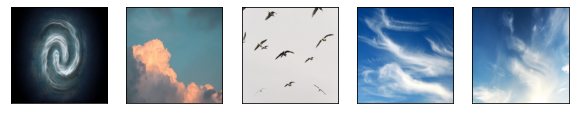

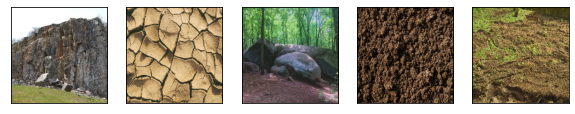

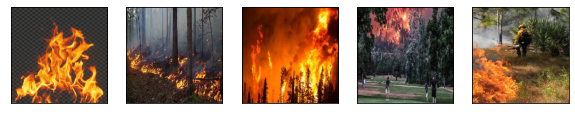

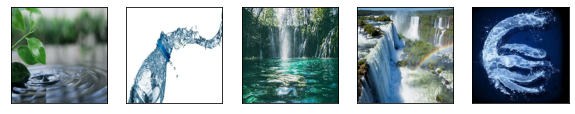

In [43]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_images_from_path(path, label): # generic load image en label op basis van map naam
    images = []
    labels = []

    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
        
    return images, labels

def show_images(images): # generic show image voor dit model
    fig, axes = plt.subplots(1, 5, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

## setup training and testing images ##

x = []
y = []

images, labels = load_images_from_path('datasets/elements/air', 0)
show_images(images)
x += images
y += labels

images, labels = load_images_from_path('datasets/elements/earth', 1)
show_images(images)
x += images
y += labels

images, labels = load_images_from_path('datasets/elements/fire', 2)
show_images(images)
x += images
y += labels

images, labels = load_images_from_path('datasets/elements/water', 3)
show_images(images)
x += images
y += labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # split 20% of the training images off for testing

Epoch 1/5
4/4 [==============================] - 2s 367ms/step - loss: 4.9577 - accuracy: 0.1875 - val_loss: 1.3850 - val_accuracy: 0.2500
Epoch 2/5
4/4 [==============================] - 1s 330ms/step - loss: 1.3609 - accuracy: 0.3750 - val_loss: 2.0606 - val_accuracy: 0.1250
Epoch 3/5
4/4 [==============================] - 1s 330ms/step - loss: 1.3280 - accuracy: 0.5312 - val_loss: 1.2133 - val_accuracy: 0.3750
Epoch 4/5
4/4 [==============================] - 1s 336ms/step - loss: 0.9619 - accuracy: 0.6562 - val_loss: 0.9458 - val_accuracy: 0.6250
Epoch 5/5
4/4 [==============================] - 1s 343ms/step - loss: 0.8093 - accuracy: 0.5938 - val_loss: 1.5886 - val_accuracy: 0.5000


[]

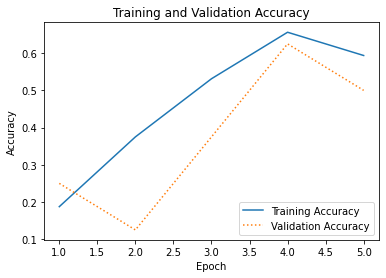

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

## preprocess images ##

from tensorflow.keras.utils import to_categorical

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train_encoded, validation_data=(x_test, y_test_encoded), batch_size=10, epochs=5)

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [53]:
# get test image and predict ############# FAILED EXPERIMENT, TRIED TO FOLLOW NUMBERS CNN

# import random

# testimages, labels = load_images_from_path('datasets/elements_testing', 5)

# test_images = []
# test_images.append(x[random.randrange(0, len(x_train-1))]) 
# test_images.append(x[random.randrange(0, len(x_train-1))])
# test_images.append(x[random.randrange(0, len(x_train-1))])
# test_images.append(x[random.randrange(0, len(x_train-1))])
# test_images.append(x[random.randrange(0, len(x_train-1))])
# show_images(test_images)

# reshaped_test_images = np.array(test_images) / 255

# x = reshaped_test_images[2].reshape(224, 224, 3) / 255
# predicted_class = np.argmax(model.predict(x, verbose=1), axis=-1)[0]
# print('Looks like a ' + str(predicted_class) + '!')

air: 1.364744548482122e-07
earth: 0.0006057410500943661
fire: 0.9993941783905029
water: 7.763183873521484e-09


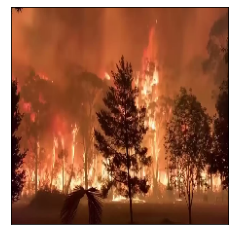

In [50]:
from keras.preprocessing import image

class_labels = ['air', 'earth', 'fire', 'water']

x2 = image.load_img('datasets/elements_testing/test2.png', target_size=(224, 224, 3))
plt.xticks([])
plt.yticks([])
plt.imshow(x2)

x2 = image.img_to_array(x2) / 255
x2 = np.expand_dims(x2, axis=0)
y2 = model.predict(x2)[0]

for i, label in enumerate(class_labels):
    print(f'{label}: {y2[i]}')

# for i in range(4):
#     print(y[i-1]) 

# for i in range(len(y2)):
#     print(": " + str(y2[i]))

